In [33]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [34]:
df = pd.read_csv('/content/drive/MyDrive/ortho_knnnb.csv')

In [35]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [37]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [38]:
df.shape

(310, 7)

In [39]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [40]:
df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


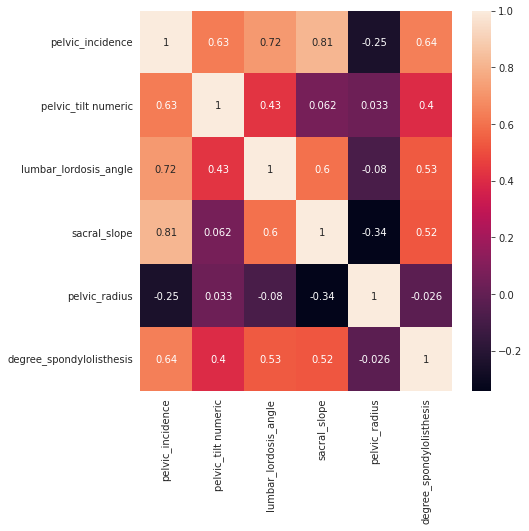

In [41]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

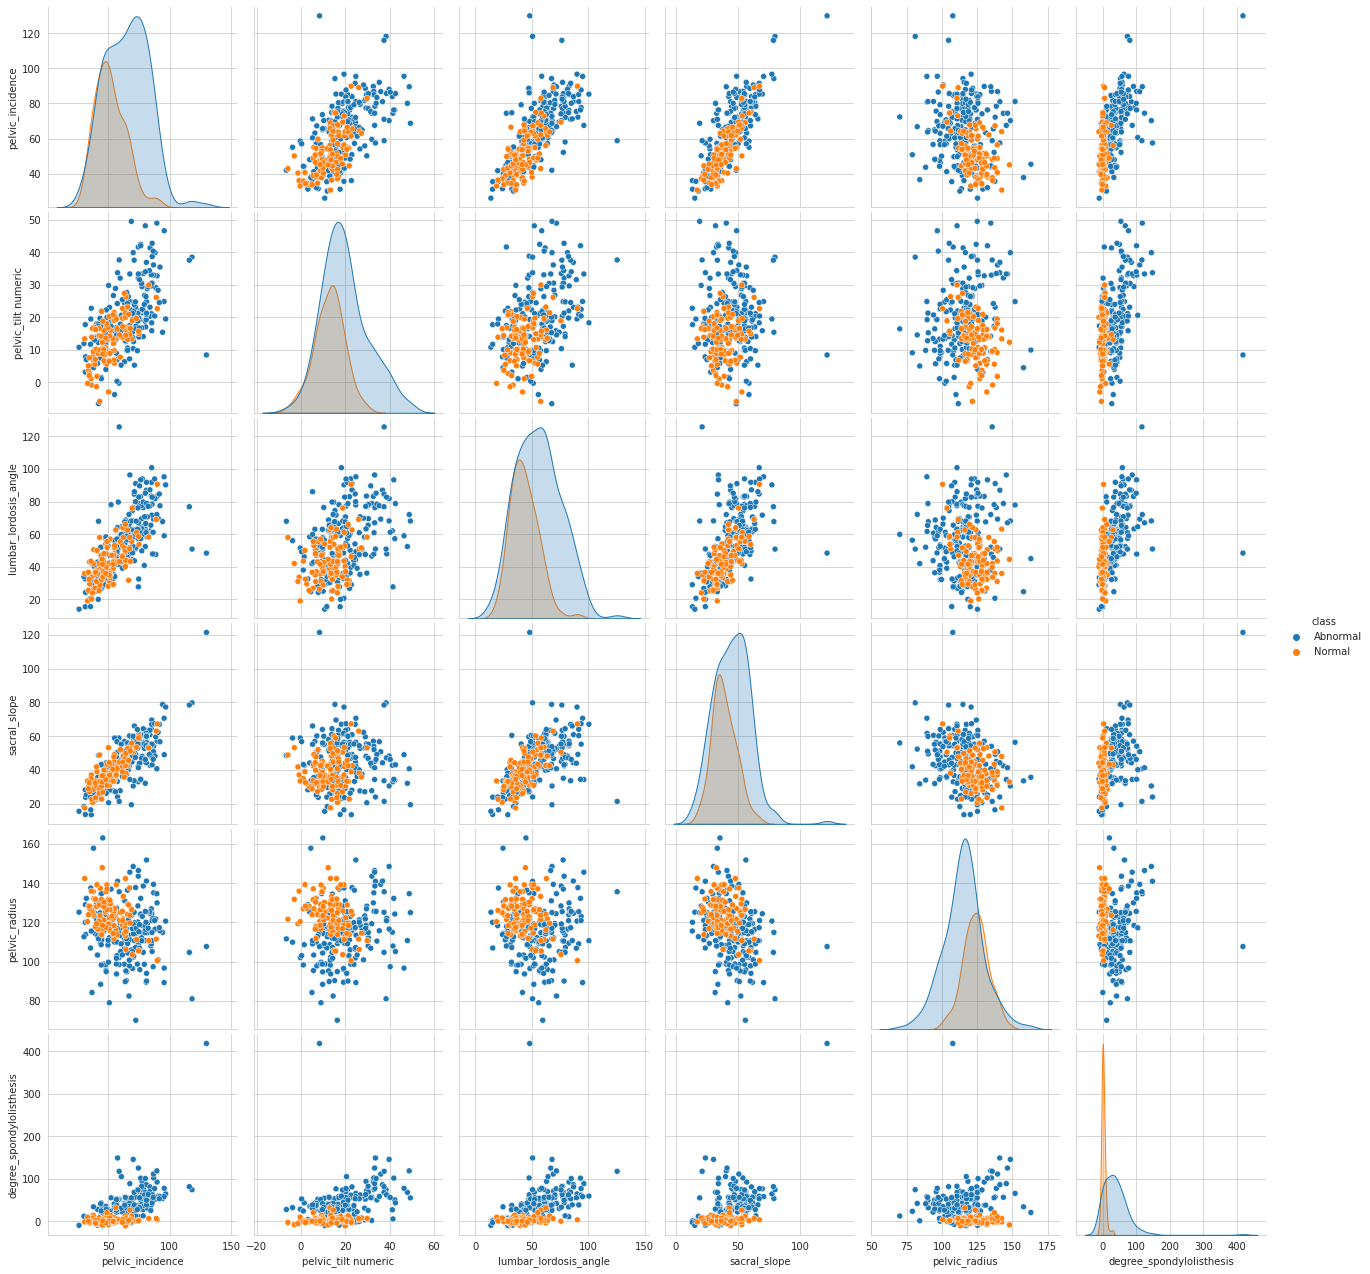

In [42]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="class", size=3);
plt.show()

In [59]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [60]:
df['symptom_class'] = df['class'].replace({"Abnormal":1,"Normal":0})

In [61]:
df.drop('class',axis=1,inplace=True)

In [62]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [63]:
df.symptom_class.value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [64]:
X = df.drop('symptom_class',axis=1)
y = df['symptom_class']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_acc = []
value_k = []
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(X_test)
  test_score= accuracy_score(y_test,test_pred)*100
  test_acc.append(test_score)
  value_k.append(k)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  82.05128205128204 Value of K:  1
Test Accuracy:  78.2051282051282 Value of K:  2
Test Accuracy:  82.05128205128204 Value of K:  3
Test Accuracy:  84.61538461538461 Value of K:  4
Test Accuracy:  76.92307692307693 Value of K:  5
Test Accuracy:  82.05128205128204 Value of K:  6
Test Accuracy:  78.2051282051282 Value of K:  7
Test Accuracy:  79.48717948717949 Value of K:  8
Test Accuracy:  79.48717948717949 Value of K:  9
Test Accuracy:  80.76923076923077 Value of K:  10
Test Accuracy:  79.48717948717949 Value of K:  11
Test Accuracy:  79.48717948717949 Value of K:  12
Test Accuracy:  80.76923076923077 Value of K:  13
Test Accuracy:  78.2051282051282 Value of K:  14
Test Accuracy:  78.2051282051282 Value of K:  15
Test Accuracy:  79.48717948717949 Value of K:  16
Test Accuracy:  78.2051282051282 Value of K:  17
Test Accuracy:  82.05128205128204 Value of K:  18
Test Accuracy:  80.76923076923077 Value of K:  19


In [75]:
print('Best accuracy is found {} when k is {}'.format(max(test_acc),value_k[test_acc.index(max(test_acc))]))

Best accuracy is found 84.61538461538461 when k is 4


In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           1       0.92      0.81      0.86        57

    accuracy                           0.81        78
   macro avg       0.76      0.81      0.78        78
weighted avg       0.84      0.81      0.82        78



In [77]:
print(confusion_matrix(y_test,test_pred))

[[17  4]
 [11 46]]


In [78]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(X_train,y_train)
pred=nv.predict(X_test)

In [79]:
print('Accuracy score :',accuracy_score(y_test,pred)*100)

Accuracy score : 79.48717948717949


In [80]:
print(confusion_matrix(y_test,pred))

[[19  2]
 [14 43]]
